In [1]:
from data_process.pre_process import *
from model.FCNN import *
import torch
%matplotlib inline

data=Data(12,6)
data.get_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.crop_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.normalise()
data.filter_data(f=(20,50), butterworth_order=4, btype='bandpass')
data.rectify_data()
x,y = data.windowing_data(200, 20)

Not yet!!!!!!!!!!!!!!!!!!!!


<Axes: >

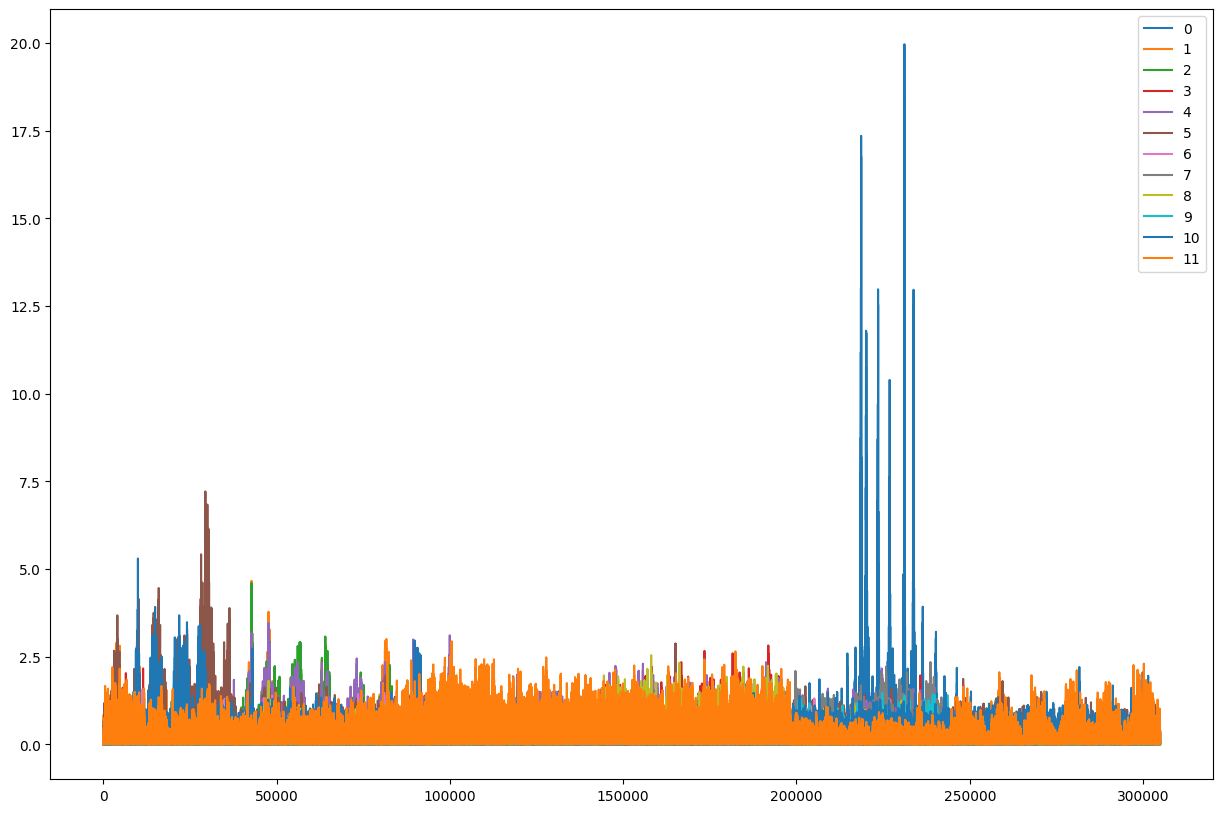

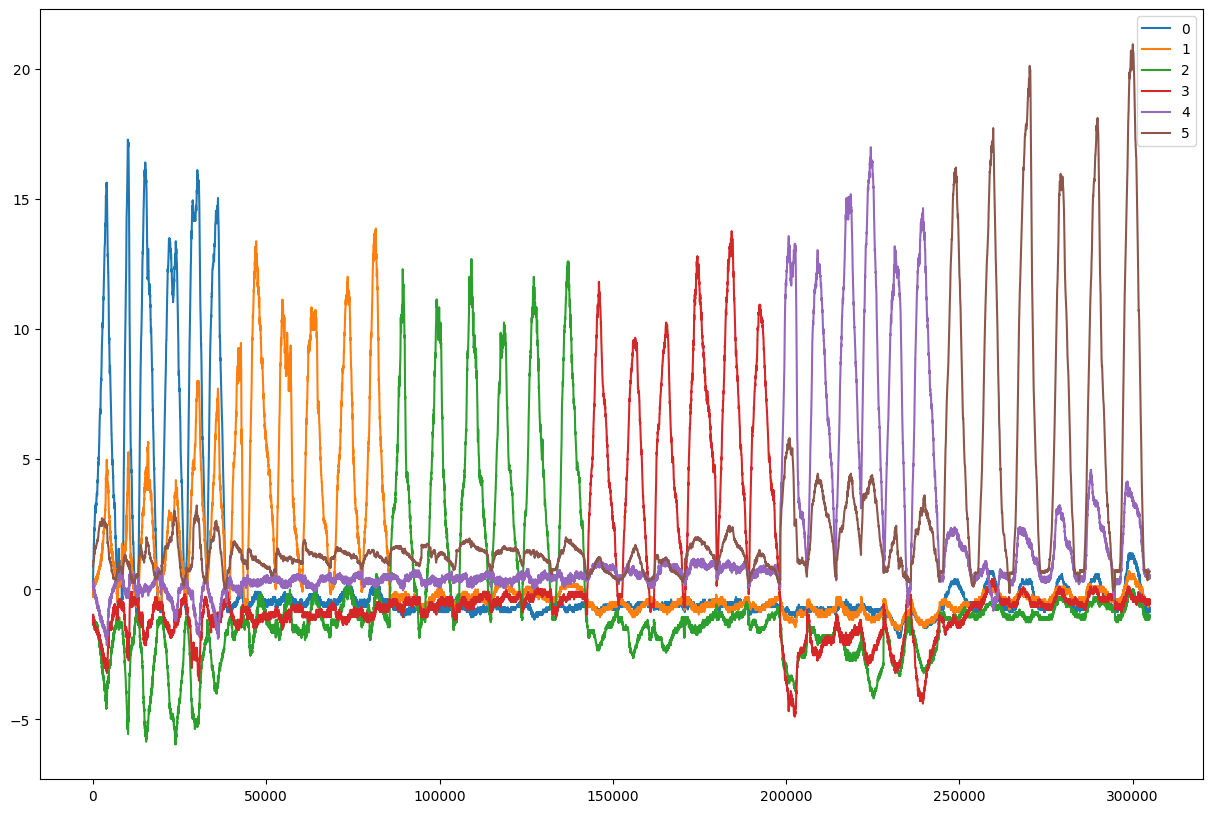

In [2]:
data.emg_signal[:].plot(figsize = (15,10))
data.force_signal[:].plot(figsize = (15,10))

In [3]:
from data_process.feature import *

feature=feature(x)
feature.time_features_estimation(x, 200, data.emg_raw)
print(feature.time_features_matrix.shape)

(15237, 8)
(15237, 8)


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = MyModel(8, 6)
model.to(device)
checkpoint = torch.load('model_path/FCNN-b32-01:14:28.pth')
model.load_state_dict(checkpoint['net'])
x = feature.time_features_matrix.astype(np.float32)
x = torch.tensor(x).to(device)
# y_c1 = y[:,0,None].astype(np.float32)
# y_c1 = torch.tensor(y_c1).to(device)
y = y.astype(np.float32)
y = torch.tensor(y).to(device)
res = result(model, x, y)

cuda
torch.Size([15237, 8])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
torch.Size([1, 6])
tor

In [11]:
# pd.DataFrame(y)[:].plot(figsize=(15,10))
np.DataFrame(res[0:400,:]).plot(figsize=(15,10))
data.force_signal[:].plot(figsize = (15,10))

KeyError: (slice(0, 400, None), slice(None, None, None))